In [9]:
import  os
import  numpy as np
import  numpy.random  as rd
import scipy as sp
from scipy import stats as st
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [2]:
# データを生成
x = np.random.normal(0, 1, (10000, 3))

mu = np.mean(x, axis=0)
sigma = np.cov(x.T)

# マハラノビス距離を格納
md = np.zeros((10000))

for i, ix in enumerate(x):
    md[i] = np.sqrt(np.dot(np.dot((ix - mu), np.linalg.inv(sigma)), (ix - mu)))

In [3]:
# 閾値を設定
theta = 3
# マハラノビス距離が閾値を超えるものをflag=1とする
flag = []
for i, imd in enumerate(md):
    if imd > theta:
        print(i, x[i])
        flag.append(1)
    else:
        flag.append(0)

# xとflagを結合
data = np.concatenate((x, np.array(flag).reshape(10000, 1)), axis=1)

54 [-3.18240008  0.00422807  1.0930399 ]
58 [ 0.26779027 -0.66397869  2.96382936]
228 [ 2.87890419 -0.46387505 -1.3340428 ]
283 [ 1.68740135  0.77608915  2.54441835]
307 [-2.94869328  0.01111373  0.73092176]
310 [ 3.97121529 -0.26635566 -1.39230869]
358 [ 2.21305421  2.46494737 -1.28558913]
385 [-2.70234896  1.72655461 -0.15162304]
413 [-1.0363255  -2.54369865  1.92085975]
476 [ 1.62198644 -1.55623115 -2.04921253]
500 [-0.53327916 -2.50595054 -1.76031785]
508 [ 1.75049574  1.86487278 -2.5286492 ]
562 [ 0.19357424  0.52281495  3.1909206 ]
567 [-0.60374709  3.07943478 -2.02188857]
583 [ 0.36681694  0.92077228  3.07589253]
642 [ 2.27303589  0.59563625  2.66487395]
644 [ 0.81122097  2.69967574 -2.32565197]
655 [ 0.44729351 -2.50112724 -2.5500228 ]
682 [ 3.45531456  0.48194709  0.03928277]
683 [-1.13277871  2.87168154 -0.14551533]
713 [ 2.76218999 -1.36071069 -0.10789691]
729 [-0.10924991 -2.19832193 -2.12472677]
760 [-1.10857844 -2.66717098 -1.97495828]
769 [ 3.1682139   0.09440948  0.7327

8872 [-2.1577317   2.0862951   0.55724826]
8901 [ 3.1613525  -0.67432585  0.5106289 ]
8920 [ 2.31897924 -1.65290377  1.24573868]
8971 [-3.57082525  0.90241912  1.22378472]
9068 [-0.68257954 -3.40919463 -1.26468159]
9075 [ 2.90251687 -1.23417362 -0.16814283]
9128 [ 1.54866349 -2.33750277 -1.66392472]
9133 [-0.94078061 -2.14943567  2.26334686]
9178 [-1.01208213 -0.55973488  3.16199891]
9220 [-1.19088483 -1.56217313 -2.84148698]
9241 [-1.80116007  2.48642363 -0.28715302]
9262 [-0.7778568   2.94761242  0.75973452]
9283 [-1.90527596  2.57796005  0.68085465]
9306 [-0.21634914  3.27534952 -2.17231433]
9316 [ 1.58383043  1.30866949  2.51945644]
9350 [-1.62404865  1.70515973 -2.14701831]
9360 [-1.53090944  1.87070248 -1.95965165]
9363 [-2.52683733  0.09237467  2.51285314]
9395 [-0.35041141  2.07177723  2.64263549]
9488 [-1.5201145  -1.50096715  2.13547911]
9505 [ 1.73323296 -0.98585046  2.39961779]
9637 [-0.49523745  1.13487814 -2.93653364]
9648 [ 0.91289849 -2.57285584 -2.54977441]
9656 [-2.08

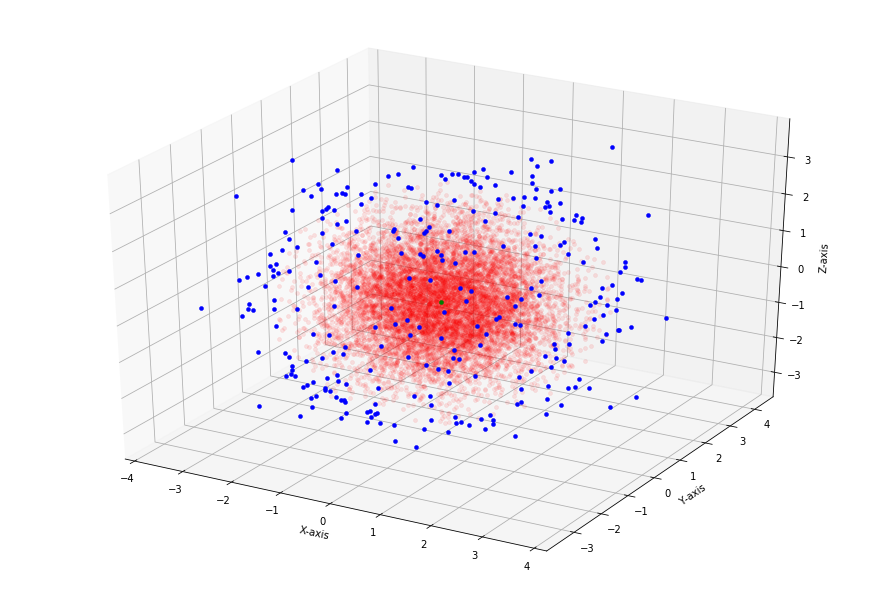

In [4]:
# グラフ作成
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# 表示範囲の設定
ax.set_xlim(np.min(x[:, 0])-0.1, np.max(x[:, 0])+0.1)
ax.set_ylim(np.min(x[:, 1])-0.1, np.max(x[:, 1])+0.1)
ax.set_zlim(np.min(x[:, 2])-0.1, np.max(x[:, 2])+0.1)

d1 = data[data[:, 3] == 0]
d2 = data[data[:, 3] == 1]
d3 = mu.reshape((1, 3))

# グラフ描画
ax.plot(d1[:, 0], d1[:,1], d1[:,2], "o", color="red", ms=4, mew=0.5, alpha=0.1)
ax.plot(d2[:,0], d2[:,1], d2[:,2], "o", color="blue", ms=4, mew=0.5)
ax.plot(d3[:,0], d3[:,1], d3[:,2], "o", color="green", ms=4, mew=0.5, alpha=1)

plt.show()

In [5]:
os.chdir("..")
home_dir = os.getcwd()
os.chdir("src")
from md import mahalanobis_distance
os.chdir(home_dir)

In [6]:
# データを生成
x = np.random.normal(0, 1, (10000, 3))
theta = 3 # 閾値

md = mahalanobis_distance(x)
md.calc_distance(x)
md.sort_distance(x)
md.check_outlier(x, theta)

In [7]:
for i, f in enumerate(md.flag):
    if f:
        print(md.x_md[i])

[  2.03838695   2.75297962  -1.26444175  24.        ]
[  3.52521258   0.62469459  -2.16603423  39.        ]
[ -0.48684328  -1.41609133  -2.82361355  53.        ]
[  0.10756497  -3.35948385  -0.12016226  81.        ]
[   2.99912902   -2.32578106   -0.42572531  110.        ]
[   2.2398087    -2.38679767    0.60442694  114.        ]
[  -1.55931596   -3.3027836    -1.95013482  189.        ]
[   1.51982817    2.99468325   -0.44136835  205.        ]
[  -0.814085      3.51755711   -0.63523599  216.        ]
[  -2.94342481   -1.02547448    0.62570834  285.        ]
[   2.88373979    1.06093924   -1.2162523   327.        ]
[  -0.94728295   -0.66613344    3.04651201  343.        ]
[  -0.73550752   -2.48962415   -2.4584669   364.        ]
[   3.05264298   -0.89608389   -0.92308156  366.        ]
[   0.78165197    1.92038614    3.04280963  394.        ]
[  -2.19165323   -2.72451959   -1.28222742  445.        ]
[  1.41778236e+00   3.64440306e-01  -3.16106761e+00   5.00000000e+02]
[  -0.68326043    

[ -1.71847812e+00  -9.78182912e-01  -2.60217222e+00   7.57600000e+03]
[  4.08317041e-01  -1.77003494e+00   3.03269246e+00   7.60600000e+03]
[  2.96301128e+00   8.80433088e-01  -7.20877474e-02   7.61000000e+03]
[ -1.24313503e+00  -3.06170904e+00  -8.90994687e-01   7.61800000e+03]
[  9.98566961e-01   4.05716312e-01   2.84809029e+00   7.64600000e+03]
[  2.17320998e+00  -2.27540868e+00   6.30624423e-01   7.72600000e+03]
[  1.30776979e+00  -3.14680242e+00   2.10863603e+00   7.73300000e+03]
[  2.76863682e+00   1.94218942e+00   1.14079639e+00   7.77400000e+03]
[  2.02697343e+00  -2.92985789e+00  -6.30008830e-01   7.78600000e+03]
[  1.42228374e+00  -2.58773545e+00  -1.52188709e+00   7.88100000e+03]
[  9.58007443e-01  -2.59023320e+00  -1.76733853e+00   7.93000000e+03]
[ -7.97762535e-02  -2.12876408e+00   2.12972366e+00   7.94600000e+03]
[  2.42290927e+00  -1.56062635e+00   2.10817498e+00   7.95000000e+03]
[  1.48460539e+00   2.85715985e+00   1.29889474e+00   7.97300000e+03]
[  2.53527529e+00   

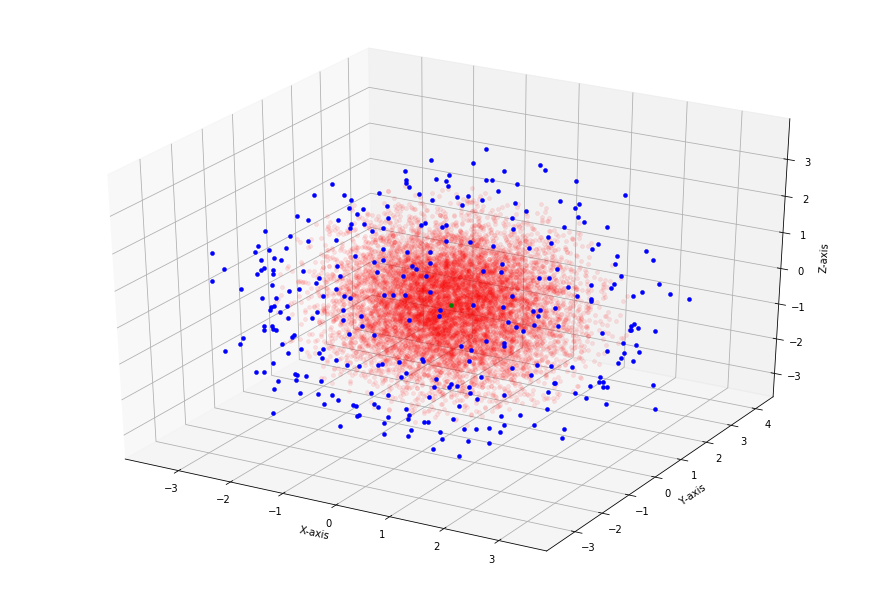

In [8]:
# グラフ作成
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# 表示範囲の設定
ax.set_xlim(np.min(x[:, 0])-0.1, np.max(x[:, 0])+0.1)
ax.set_ylim(np.min(x[:, 1])-0.1, np.max(x[:, 1])+0.1)
ax.set_zlim(np.min(x[:, 2])-0.1, np.max(x[:, 2])+0.1)

d1 = md.x_flag[md.x_flag[:, 3] == 0]
d2 = md.x_flag[md.x_flag[:, 3] == 1]
d3 = md.mu.reshape((1, 3))

# グラフ描画
ax.plot(d1[:, 0], d1[:,1], d1[:,2], "o", color="red", ms=4, mew=0.5, alpha=0.1)
ax.plot(d2[:,0], d2[:,1], d2[:,2], "o", color="blue", ms=4, mew=0.5)
ax.plot(d3[:,0], d3[:,1], d3[:,2], "o", color="green", ms=4, mew=0.5, alpha=1)

plt.show()

In [ ]:
pd.DataFrame("data/nikkei225_d.csv")